In [1]:
import pandas as pd
import re
import numpy as np 
import seaborn as sns
import pickle
import matplotlib.pyplot as plt
from datetime import datetime, date

In [2]:
#read data
listings_2017 = pd.read_csv('InsideAirBnb/listings_2017.csv')
listings_2018 = pd.read_csv('InsideAirBnb/listings_2018.csv')

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (87) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (43) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
#define outcome as listings in 2017 that don't appear in 2018
set_18 = set(listings_2018.id)
listings_2017['drop_out'] = listings_2017['id'].apply(lambda x: 0 if x in set_18 else 1)
print(listings_2017.drop_out.value_counts(dropna = False))

listings_2017.set_index('id', inplace = True)

0    18425
1    11737
Name: drop_out, dtype: int64


In [4]:
listings_2017.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 6627359 to 12066922
Data columns (total 95 columns):
listing_url                         30162 non-null object
scrape_id                           30162 non-null int64
last_scraped                        30162 non-null object
name                                30162 non-null object
summary                             29447 non-null object
space                               21223 non-null object
description                         30156 non-null object
experiences_offered                 30162 non-null object
neighborhood_overview               18075 non-null object
notes                               13621 non-null object
transit                             17652 non-null object
access                              18664 non-null object
interaction                         17863 non-null object
house_rules                         21408 non-null object
thumbnail_url                       25692 non-null object
medium_url   

In [5]:
listings_2017.describe()

,scrape_id,host_id,host_acceptance_rate,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month,drop_out
count,3.016200e+04,3.016200e+04,0.0,30152.000000,30152.000000,0.0,30162.000000,30162.000000,30162.000000,30063.000000,...,23059.000000,23019.000000,23020.000000,22986.000000,23018.000000,22982.000000,22974.000000,30162.000000,23357.000000,30162.000000
mean,2.017040e+13,3.487289e+07,NaN,5.109213,5.109213,NaN,34.056197,-118.336155,3.411445,1.376060,...,94.186044,9.611799,9.410990,9.765857,9.769311,9.609346,9.479890,3.460845,1.827499,0.389132
std,1.026970e+01,3.312089e+07,NaN,24.777857,24.777857,NaN,0.102051,0.152590,2.471226,0.823774,...,7.964227,0.784745,0.959283,0.657675,0.641670,0.730362,0.833353,5.400201,1.894675,0.487561
min,2.017040e+13,5.900000e+01,NaN,0.000000,0.000000,NaN,33.338905,-118.911026,1.000000,0.000000,...,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,0.020000,0.000000
25%,2.017040e+13,7.216112e+06,NaN,1.000000,1.000000,NaN,34.013987,-118.433115,2.000000,1.000000,...,92.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,1.000000,0.410000,0.000000
50%,2.017040e+13,2.407992e+07,NaN,2.000000,2.000000,NaN,34.066379,-118.350220,2.000000,1.000000,...,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000,1.120000,0.000000
75%,2.017040e+13,5.333126e+07,NaN,4.000000,4.000000,NaN,34.103849,-118.269669,4.000000,1.500000,...,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,3.000000,2.690000,1.000000
max,2.017040e+13,1.238270e+08,NaN,856.000000,856.000000,NaN,34.742088,-117.655471,16.000000,8.000000,...,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,48.000000,18.880000,1.000000


In [6]:
listings_2017.head()

,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,...,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,drop_out
id,,,,,,,,,,,,,,,,,,,,,
6627359,https://www.airbnb.com/rooms/6627359,20170402075022,2017-04-02,Beautiful Beverly Hills Estate,Private estate with private driveway and walkw...,NaN,Private estate with private driveway and walkw...,none,NaN,Private events or video shoots can be booked b...,...,f,NaN,"City of Los Angeles, CA",f,flexible,f,f,6,NaN,0
13960394,https://www.airbnb.com/rooms/13960394,20170402075022,2017-04-02,Beverly Hills Chateau,"The home is a gorgeous 5 bedroom, 5 bathroom, ...",NaN,"The home is a gorgeous 5 bedroom, 5 bathroom, ...",none,NaN,NaN,...,f,NaN,"City of Los Angeles, CA",f,strict,f,f,4,NaN,0
17992978,https://www.airbnb.com/rooms/17992978,20170402075022,2017-04-02,Grande Bellezza - 119182,Experience inviting Italian elegance in Beverl...,The villa’s refinement is set off by the views...,Experience inviting Italian elegance in Beverl...,none,Points of Interest 5.7 miles to Rodeo Drive 6 ...,All credit card holders must be aged 25 years ...,...,f,NaN,NaN,f,super_strict_60,f,f,12,NaN,1
11344969,https://www.airbnb.com/rooms/11344969,20170402075022,2017-04-02,Beverly Hills Private Guest House,Newly renovated guest house with huge flatscre...,NaN,Newly renovated guest house with huge flatscre...,none,NaN,NaN,...,f,NaN,"City of Los Angeles, CA",f,flexible,f,f,1,NaN,0
8985400,https://www.airbnb.com/rooms/8985400,20170402075022,2017-04-02,Private room in lovely condo,LOCATION!! Your own private room with bathroom...,NaN,LOCATION!! Your own private room with bathroom...,none,"safe, peaceful tree lined street",NaN,...,f,NaN,"City of Los Angeles, CA",f,strict,f,f,3,0.9,1


# Data cleaning

1. Drop Rows with missing host info (n = 10)
2. Drop Columns with redundant, missing, or irrelevant information
3. Change dates to datetimes
4. Change dollars and percentages to float
5. Fill in NA values where is makes sense
6. Clean categories
    -Zipcodes: Extract 5 digits
    -Property types: Group miscellaneous property types
    -Change other text fields to categories
7. Binarize true/false variables



In [7]:
#Drop rows with missing how info (n= 10)
listings_2017 = listings_2017[listings_2017['host_since'].notnull()]

In [8]:
#Drop columns with all missing or irrelevant data
cols = ['scrape_id',                        #not informative
        'last_scraped',                     #all same values
        'thumbnail_url',                    #not informative
        'medium_url',                       #not informative
        'picture_url',                      #not informative
        'xl_picture_url',                   #not informative
        'host_acceptance_rate',             #all blank
        'host_url',                         #not informative
        'host_thumbnail_url',               #not informative
        'host_picture_url',                 #not informative
        'host_total_listings_count',        #uncleaned version of calculated_host_listings_count
        'host_listings_count',              #uncleaned version of calculated_host_listings_count
        'street',                           #duplicate of neighbourhood, city, zip
        'city',                             #not informative, half have 'los angeles'
        'state',                            #not informative, all have 'CA' or errors
        'market',                           #not informative, almost all have 'Los Angeles' or 'Domestic (Other)'
        'experiences_offered',              #all blank
        'neighbourhood',                    #duplicate of neighbourhood_cleansed
        'neighbourhood_group_cleansed',     #all blank
        'country_code',                     #all same values
        'country',                          #all same values
        'square_feet',                      #only 381 non null values
        'has_availability',                 #all null
        'calendar_last_scraped',            #not informative
        'license'                           #only 43 non null values   
       ]
listings_2017 = listings_2017.drop(cols, axis=1)

#All dates to datetime
cols = ['host_since', 
        'first_review', 
        'last_review']
time_format = '%Y-%m-%d'
listings_2017[cols]= (listings_2017[cols]
                      .apply(pd.to_datetime, format=time_format))

#All dollars to float
cols = ['price',
        'weekly_price', 
        'monthly_price', 
        'security_deposit', 
        'cleaning_fee',
        'extra_people'
       ]
listings_2017[cols] = (listings_2017[cols]
                       .replace({'\$': '', ',': ''}, regex=True)
                       .astype(float))

#All percentages to float
listings_2017['host_response_rate'] = (listings_2017['host_response_rate']
                                       .replace({'%': ''}, regex=True)
                                       .astype(float))
#Zero fill
listings_2017.loc[listings_2017['reviews_per_month'].isnull(), 'reviews_per_month'] = 0
listings_2017.loc[listings_2017['cleaning_fee'].isnull(), 'cleaning_fee'] = 0
listings_2017.loc[listings_2017['security_deposit'].isnull(), 'security_deposit'] = 0
listings_2017.loc[listings_2017['bathrooms'].isnull(), 'bathrooms'] = 0
listings_2017.loc[listings_2017['bedrooms'].isnull(), 'bedrooms'] = 0
listings_2017.loc[listings_2017['beds'].isnull(), 'beds'] = 1
listings_2017.loc[listings_2017['review_scores_rating'].isnull(), 'review_scores_rating'] = 0
listings_2017.loc[listings_2017['review_scores_accuracy'].isnull(), 'review_scores_accuracy'] = 0
listings_2017.loc[listings_2017['review_scores_cleanliness'].isnull(), 'review_scores_cleanliness'] = 0
listings_2017.loc[listings_2017['review_scores_checkin'].isnull(), 'review_scores_checkin'] = 0
listings_2017.loc[listings_2017['review_scores_communication'].isnull(), 'review_scores_communication'] = 0
listings_2017.loc[listings_2017['review_scores_location'].isnull(), 'review_scores_location'] = 0
listings_2017.loc[listings_2017['review_scores_value'].isnull(), 'review_scores_value'] = 0


#Zipcode cleaning
pattern = r'\d{5}'
listings_2017['zipcode_cleansed'] = listings_2017['zipcode'].str.extract('(\d{5})', expand = True)
listings_2017[listings_2017['zipcode'].str.len() >5][['zipcode', 'zipcode_cleansed']]
listings_2017 = listings_2017.drop(['zipcode'], axis=1)

#Clean property_type
listings_2017['property_type_cleansed'] = 'other'
listings_2017.loc[listings_2017['property_type'] == 'Apartment', 'property_type_cleansed'] = 'apartment'
listings_2017.loc[listings_2017['property_type'] == 'House', 'property_type_cleansed'] = 'house'
listings_2017.loc[listings_2017['property_type'] == 'Condominium', 'property_type_cleansed'] = 'condominium'
listings_2017.loc[listings_2017['property_type'] == 'Townhouse', 'property_type_cleansed'] = 'townhouse'
listings_2017.loc[listings_2017['property_type'] == 'Loft', 'property_type_cleansed'] = 'loft'
listings_2017.loc[listings_2017['property_type'] == 'Guesthouse', 'property_type_cleansed'] = 'guesthouse'
listings_2017.loc[listings_2017['property_type'] == 'Bungalow', 'property_type_cleansed'] = 'bungalow'
listings_2017.loc[listings_2017['property_type'] == 'Bed & Breakfast', 'property_type_cleansed'] = 'bed_and_breakfast'
listings_2017 = listings_2017.drop(['property_type'], axis=1)

#Specify categories
#Special notes
#host_response_time
#  Per https://www.airbnb.com/help/article/430/what-is-response-rate-and-how-is-it-calculated:
#  host response time/rate is calculated from 10+ messages from last 30d, or 90d if not enough messages
#  reponses after 24 hours count as late
#  Nans likely do not have enough responses
cols = ['room_type',
        'property_type_cleansed',
        'host_neighbourhood',
        'host_response_time', 
        'neighbourhood_cleansed',
        'zipcode_cleansed',
        'smart_location',
        'bed_type',
        'cancellation_policy']
listings_2017[cols] = (listings_2017[cols]
                       .astype('category'))

#Change to binary
cols = ['host_is_superhost',
        'host_has_profile_pic', 
        'host_identity_verified',
        'is_location_exact',
        'requires_license',
        'instant_bookable',
        'require_guest_profile_picture',
        'require_guest_phone_verification']
listings_2017[cols] = (listings_2017[cols]
                       .applymap(lambda x: 1 if x == 't' else 0))

# Feature Generation

1. Extract host verification types and amenities indicators
2. Calculate estimated monthly income, given 1 review for every two stays and average length of stay = 3 nights:
    monthly_occupancy = 3 * reviews_per_month/0.5 
    monthly_income = monthly_occupancy * price
3. Calculate days since date stamps
    host_days = days since host_since
    first_review_days = days since first_review, if missing than set to host_days
    last_review_days = days since last_review, if missing than set to host_days
    calndar_updated_days = days calculated from calendar updated, if never then set to host_days 
4. Coordinates of listing
5. Host is in same neighbourhood as listing



In [9]:
#Binarize host verifications
listings_2017['host_verifications'] = (listings_2017['host_verifications']
                                       .replace({'\[': '', 
                                                 '\'': '', 
                                                 '\]': '', 
                                                 ' ': ''}, regex=True)
                                       .str.split(','))
vers_lst = list(set().union(*listings_2017['host_verifications']))
vers_lst.remove('')
vers_vars = ['host_v_' + s for s in vers_lst]
verifications = list(zip(vers_lst, vers_vars))

for x, y in verifications:
    listings_2017[y] = listings_2017['host_verifications'].apply(lambda j: 1 if x in j else 0)

listings_2017 = listings_2017.drop(['host_verifications'], axis=1)


#Binarize amenities
listings_2017['amenities'] = (listings_2017['amenities']
                              .replace({'{':'', 
                                        'translation missing: en.':'', 
                                        '"': '',
                                        ' ': '_',
                                        '\(': '',
                                        '\)': '',
                                        '}':''}, regex=True)
                                .str.split(','))
amens_lst = list(set().union(*listings_2017['amenities']))
amens_lst.remove('')
amens_vars = ['amenities_' + s for s in amens_lst]
amenits = list(zip(amens_lst, amens_vars))

for x, y in amenits:
    listings_2017[y] = listings_2017['amenities'].apply(lambda j: 1 if x in j else 0)

listings_2017 = listings_2017.drop(['amenities'], axis=1)

In [10]:
#Feature generation
#monthly_occupancy = los * (review_per_month / review_rate) (where los = 3 nights, review_rate = 0.50)
listings_2017['monthly_occupancy'] = 3 * (listings_2017['reviews_per_month']/0.50) 
listings_2017['monthly_income_est'] = listings_2017['monthly_occupancy']* listings_2017['price']

#timestamps to days since, if no timestamp use start of hosting
listings_2017['host_days'] = (pd.to_datetime('2017-04-17', format = time_format) - listings_2017['host_since']).dt.days
listings_2017['first_review_days'] = (pd.to_datetime('2017-04-17', format = time_format) - listings_2017['first_review']).dt.days
listings_2017['last_review_days'] = (pd.to_datetime('2017-04-17', format = time_format) - listings_2017['last_review']).dt.days
listings_2017.loc[listings_2017['first_review_days'].isnull(), 'first_review_days'] = listings_2017['host_days']
listings_2017.loc[listings_2017['last_review_days'].isnull(), 'last_review_days'] = listings_2017['host_days']
listings_2017 = listings_2017.drop(['host_since', 'first_review', 'last_review'], axis=1)

#days since calendar updated
listings_2017['tmp'] = listings_2017['calendar_updated'].str.extract('(\d+)', expand = True)
listings_2017['calendar_updated_days'] = 0
listings_2017.loc[listings_2017['calendar_updated'] == 'yesterday', 'calendar_updated_days'] = 1
listings_2017.loc[listings_2017['calendar_updated'].str.contains('days'), 'calendar_updated_days'] = listings_2017['tmp'].astype('float')
listings_2017.loc[listings_2017['calendar_updated'].str.contains('week'), 'calendar_updated_days'] = listings_2017['tmp'].astype('float')*7
listings_2017.loc[listings_2017['calendar_updated'].str.contains('a week'), 'calendar_updated_days'] = 7
listings_2017.loc[listings_2017['calendar_updated'].str.contains('month'), 'calendar_updated_days'] = listings_2017['tmp'].astype('float')*30
listings_2017.loc[listings_2017['calendar_updated'].str.contains('never'), 'calendar_updated_days'] = listings_2017['host_days']
listings_2017 = listings_2017.drop(['tmp', 'calendar_updated'], axis=1)

#coordinates
listings_2017['coordinates'] = listings_2017[['latitude', 'longitude']].apply(tuple, axis=1)
listings_2017 = listings_2017.drop(['latitude', 'longitude'], axis=1)


In [11]:
#indicator if host is in same neighbourhood
#create a dictionary mapping listing neighborhood to host_neighbourhood:
listings_2017['neighbourhood_cleansed']= listings_2017['neighbourhood_cleansed'].str.lower()
listings_2017['host_neighbourhood']= listings_2017['host_neighbourhood'].str.lower()

neighbourhood_dict = {}
listing_neighbourhoods = listings_2017['neighbourhood_cleansed'].unique()
for x in listing_neighbourhoods:
    neighbourhood_dict[x] = [x]
neighbourhood_dict['koreatown'].append('mid-wilshire')                         #Koreatown -> Mid Wilshire
neighbourhood_dict['beverly grove'].append('west hollywood')                   #Berverly Grove -> West Hollywood, Mid-Wilshire
neighbourhood_dict['beverly grove'].append('mid-wilshire')
neighbourhood_dict['sawtelle'].append('west los angeles')                      #Sawtelle -> West Los Angeles
neighbourhood_dict['hollywood hills west'].append('laurel canyon')             #Hollywood Hills West -> Laurel Canyon, Hollywood Hills
neighbourhood_dict['hollywood hills west'].append('hollywood hills')
neighbourhood_dict['fairfax'].append('west hollywood')                         #Fairfax -> West Hollywood, Mid-Wilshire
neighbourhood_dict['fairfax'].append('mid-wilshire')
neighbourhood_dict['woodland hills'].append('woodland hills/warner center')    #Woodland Hills -> Woodland Hills/Warner Center
neighbourhood_dict['pico-robertson'].append('south robertson')                 #Pico-Robertson -> South Robertson
neighbourhood_dict['pico-union'].append('westlake')                            #Pico-Union -> Westlake
neighbourhood_dict['westchester'].append('westchester/playa del rey')          #Westchester -> Westchester/Playa Del Rey
neighbourhood_dict['beverly crest'].append('bel air/beverly crest')            #Beverly Crest -> Bel Air/Beverly Crest
neighbourhood_dict['exposition park'].append('south la')                       #Exposition Park-> South LA
neighbourhood_dict['larchmont'].append('mid-wilshire')                         #Larchmont -> Mid-Wilshire
neighbourhood_dict['playa del rey'].append('westchester/playa del rey')        #Playa Del dey -> Westchester/Playa Del Rey
neighbourhood_dict['arlington heights'].append('mid-city')                     #Arlington Heights -> Mid-City, Mid-Wilshire
neighbourhood_dict['arlington heights'].append('mid-wilshire')             
neighbourhood_dict['hancock park'].append('mid-wilshire')                      #Hancock Park -> Mid Wilshire
neighbourhood_dict['university park'].append('west adams')                     #University Park -> West Adams
neighbourhood_dict['playa vista'].append('westchester/playa del rey')          #Playa Vista -> Westchester/Playa Del Rey, Del Rey
neighbourhood_dict['playa vista'].append('del rey')                     
neighbourhood_dict['harvard heights'].append('mid-city')                       #Harvard Heights -> Mid-City, Mid-Wilshire
neighbourhood_dict['harvard heights'].append('mid-wilshire')
neighbourhood_dict['jefferson park'].append('west adams')                      #Jefferson Park -> West Adams
neighbourhood_dict['carthay'].append('mid-wilshire')                           #Carthay -> Mid-Wilshire
neighbourhood_dict['view park-windsor hills'].append('south la')               #View Park-Windsor Hills -> South LA 
neighbourhood_dict['vermont square'].append('south la')                        #Vermont Square -> South LA
neighbourhood_dict['hyde park'].append('south la')                             #Hyde Park -> South LA
neighbourhood_dict['historic south-central'].append('south la')                #Historic South-Central -> South LA
neighbourhood_dict['leimert park'].append('south la')                          #Leimert Park -> South LA
neighbourhood_dict['mid-city'].append('south robertson')                       #Mid-City -> South Robertson
neighbourhood_dict['venice'].append('marina del rey')                          #Venice -> Marina Del Rey
neighbourhood_dict['west los angeles'].append('westside')                      #West Los Angeles -> Westside
neighbourhood_dict['bel-air'].append('bel air/beverly crest')                  #Bel-Air -> Bel Air/Beverly Crest
neighbourhood_dict['windsor square'].append('mid-city')                        #Windsor Square -> Mid-City
neighbourhood_dict['granada hills'].append('granada hills north')              #Granada Hills -> Granada Hills North
neighbourhood_dict['adams-normandie'].append('west adams')                     #Adams-Normandie -> West Adams
neighbourhood_dict['cheviot hills'].append('westside')                         #Cheviot Hills -> Westside
neighbourhood_dict['century city'].append('westside')                          #Century City -> Westside
neighbourhood_dict['rancho park'].append('westside')                           #Rancho Park -> Westside
neighbourhood_dict['north hills'].append('north hills west')                   #North Hills -> North Hills West, North Hills East
neighbourhood_dict['north hills'].append('north hills east')                   #La Canada Flintridge ->La Canada Flintridge

listings_2017['dict_values']= (listings_2017['neighbourhood_cleansed'].str.lower()).map(neighbourhood_dict)
listings_2017['host_in_neighbourhood'] =listings_2017.apply(lambda r: 1 if r['host_neighbourhood'] in r["dict_values"] else 0, axis=1)

# Number of competitors

To get number of listings within a X mile radius, we will use KDtrees

KDtrees are a way to segment large group of points into spatial partitions.  Essentially it creates a tree, where each node is point along which to create a partition.  By organizing points into partions, a set of points can be found more quickly by identifying the right paritition.  For example, to find the nearest neighbor to a given point, one only needs to search the paritions which are close to a given point.  KDtrees are included in the scipy package, but pysal extends the KDtrees to use longitude/latitude

To find number of listings within an X mile radius I ran the below code.  Because it can take awhile to run, I saved the results as a pickle file to import in later runs:
  1. Create a KD tree from your points, use radius of the earth in miles
  2. Use the query_ball_point method on the KDtree passing in a point or a list of points, and search radius from points in units given in step 1
  3. A list of indices will be returned indicating the points in KD tree that are within radius

In [10]:
'''
import time
import pysal
from pysal.cg.kdtree import KDTree    

locations = list(listings_2017['coordinates'])
tree = KDTree(locations, distance_metric='Arc', radius=pysal.cg.RADIUS_EARTH_MILES)

#takes awhile to run (20-30mins)
start_time = time.time()
locations_050m = tree.query_ball_point(locations, 0.5)
print("--- %s seconds ---" % (time.time() - start_time))

start_time = time.time()
locations_1m = tree.query_ball_point(locations, 1)
print("--- %s seconds ---" % (time.time() - start_time))

start_time = time.time()
locations_5m = tree.query_ball_point(locations, 5)
print("--- %s seconds ---" % (time.time() - start_time))

start_time = time.time()
locations_10m = tree.query_ball_point(locations, 10)
print("--- %s seconds ---" % (time.time() - start_time))
'''

--- 159.7472801208496 seconds ---
--- 276.0477740764618 seconds ---
--- 711.7062747478485 seconds ---
--- 0.0016601085662841797 seconds ---


In [11]:
'''
#replace indices in results with id numbers:
id_dict = {}
for x,y in enumerate(listings_2017.index):
    id_dict[x] = y
    
def insert_id(lst):
    lst_new =[]
    for x in lst:
        x = [id_dict[y] for y in x]
        lst_new.append(x)
    return lst_new

locations_050m_new = insert_id(locations_050m)
locations_1m_new = insert_id(locations_1m)
locations_5m_new = insert_id(locations_5m)
locations_10m_new = insert_id(locations_10m)
'''

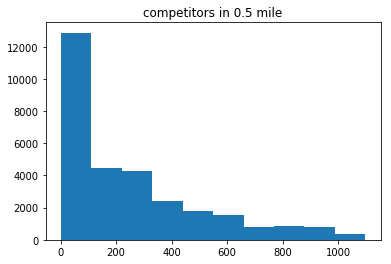

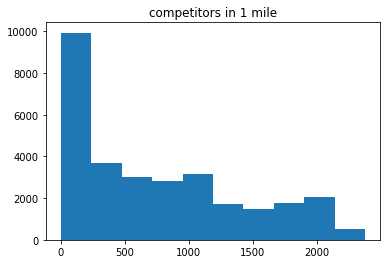

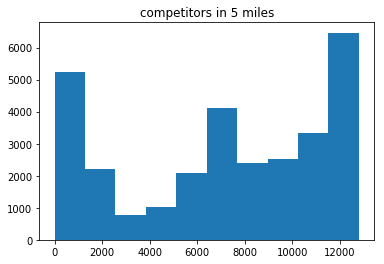

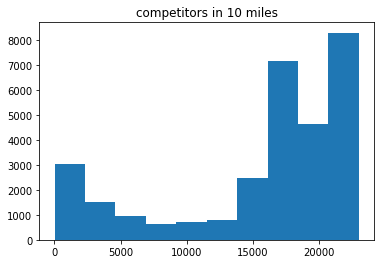

In [12]:
'''
#plot histograms of n competitors
mile_050 = [len(x) for x in locations_050m_new]
mile_1 = [len(x) for x in locations_1m_new]
mile_5 = [len(x) for x in locations_5m_new]
mile_10 = [len(x) for x in locations_10m_new]

plt.hist(mile_050)
plt.title('competitors in 0.5 mile')
plt.show()
plt.hist(mile_1)
plt.title('competitors in 1 mile')
plt.show()
plt.hist(mile_5)
plt.title('competitors in 5 miles')
plt.show()
plt.hist(mile_10)
plt.title('competitors in 10 miles')
plt.show()
'''

In [13]:
'''
#create a dataframe to save
listings_2017['n_comp_050m'] = mile_050
listings_2017['n_comp_1m'] = mile_1
listings_2017['n_comp_5m'] = mile_5
listings_2017['n_comp_10m'] = mile_10
listings_2017['l_comp_050m'] = locations_050m_new
listings_2017['l_comp_1m'] = locations_1m_new
listings_2017['l_comp_5m'] = locations_5m_new
listings_2017['l_comp_10m'] = locations_10m_new
comp = listings_2017[['n_comp_050m', 'n_comp_1m', 'n_comp_5m', 'n_comp_10m', 'l_comp_050m', 'l_comp_1m', 'l_comp_5m', 'l_comp_10m']]
comp_n = listings_2017[['n_comp_050m', 'n_comp_1m', 'n_comp_5m', 'n_comp_10m']]
comp'''

,n_comp_050m,n_comp_1m,n_comp_5m,n_comp_10m,l_comp_050m,l_comp_1m,l_comp_5m,l_comp_10m
id,,,,,,,,
6627359,26,104,10081,19166,"[1759060, 6627359, 10392524, 17419253, 1588426...","[17793359, 12429431, 12453890, 4029464, 174931...","[3834285, 30474, 12410679, 17514141, 15409453,...","[3834285, 17910060, 16381098, 17861038, 149186..."
13960394,32,90,10376,19956,"[12537595, 17793359, 4029464, 9647006, 1311807...","[13047551, 11368434, 13130794, 17944196, 11971...","[30474, 12410679, 17514141, 15409453, 13637979...","[3834285, 15355910, 12010717, 14969055, 141616..."
17992978,21,164,8083,18905,"[14749713, 15714418, 11344969, 15458745, 15661...","[9243055, 14124574, 14290875, 13166141, 710861...","[30474, 12410679, 17514141, 15409453, 13637979...","[3834285, 17910060, 7011378, 14993793, 1584205..."
11344969,34,124,9000,19088,"[12381117, 1759060, 11513183, 6031273, 6748434...","[9243055, 14124574, 14290875, 14093707, 168968...","[30474, 12410679, 17514141, 15409453, 13637979...","[3834285, 17910060, 16381098, 7011378, 1499379..."
8985400,106,326,9061,21477,"[2701715, 15634100, 9609088, 1671963, 15572690...","[2701715, 8781169, 13496008, 7347419, 571586, ...","[13731595, 16549823, 4190417, 9415050, 1247441...","[7896215, 5688839, 17845278, 16666555, 1299413..."
6688906,91,493,9199,22166,"[17017228, 926087, 1084649, 12814672, 12343111...","[2701715, 9474780, 3294283, 12117528, 15128805...","[13731595, 13217036, 4076998, 7998947, 8443959...","[7896215, 16134698, 13292266, 3249753, 2495346..."
1751569,89,471,9217,22101,"[17017228, 1084649, 12814672, 12343111, 860632...","[2701715, 9474780, 3294283, 12117528, 15128805...","[13731595, 4076998, 7998947, 2187727, 14994256...","[7896215, 16134698, 3249753, 2495346, 14011742..."
4076913,73,313,8115,20690,"[8392488, 5400221, 15005451, 9821709, 1745826,...","[2701715, 13955829, 4652615, 4512418, 8957332,...","[13731595, 11300567, 913270, 3447745, 5756079,...","[7896215, 17845278, 8440867, 4848364, 15772226..."
16573537,54,254,6528,19914,"[14523307, 4321766, 8105022, 17328597, 1598622...","[4033585, 7203585, 14344427, 5883831, 17193005...","[13731595, 11423610, 14933378, 2479155, 127119...","[7896215, 1841611, 2687962, 1049305, 2211325, ..."


In [14]:
'''
#file too big to pickle 
#with open('comp.pickle', 'wb') as handle:
#    pickle.dump(comp, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open('comp_n.pickle', 'wb') as handle:
    pickle.dump(comp_n, handle, protocol=pickle.HIGHEST_PROTOCOL)
'''
    

In [12]:
#bring in number of competitors

with open('comp_n.pickle', 'rb') as handle:
    competitors_n = pickle.load(handle)

listings_2017 = listings_2017.merge(competitors_n, how='inner', left_index = True, right_index = True)


# Data Exploration

1. Pairplot of continuous variables
2. Frequencies/boxplots of categories

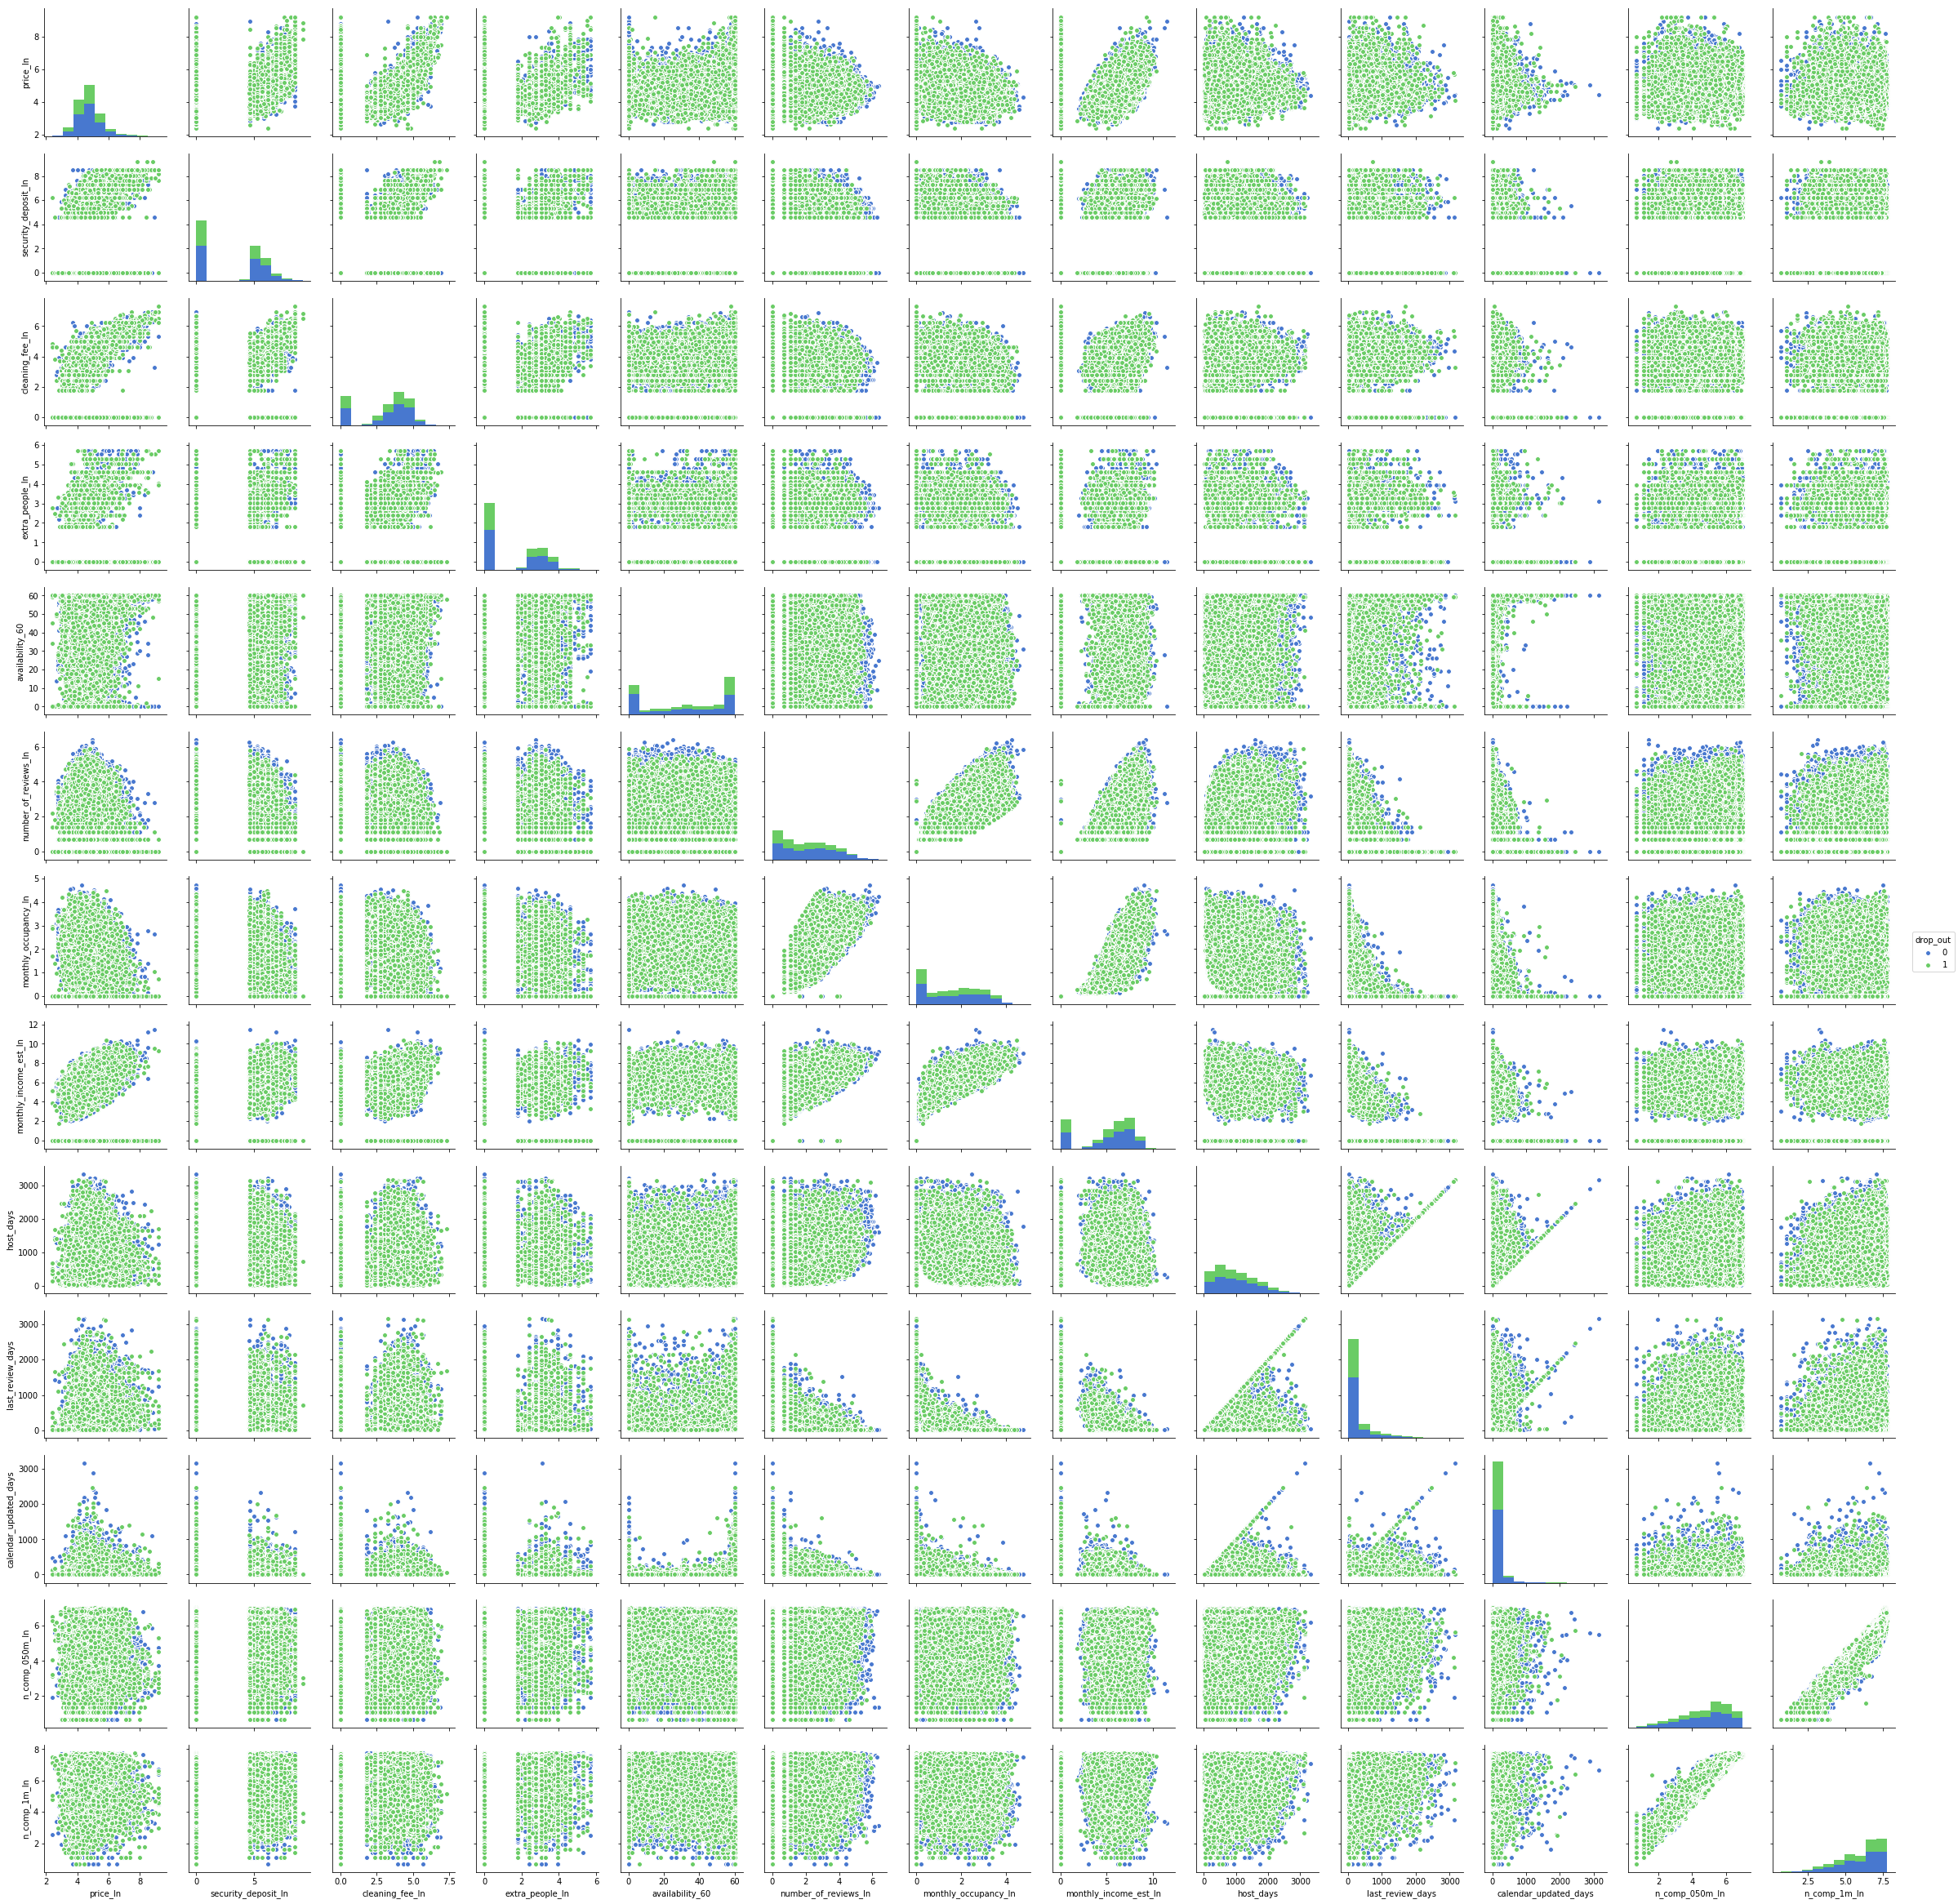

In [13]:
#Log Transform costs and other skewed distributions
cols = ['price',
        'weekly_price', 
        'monthly_price', 
        'security_deposit', 
        'cleaning_fee',
        'extra_people',
        'number_of_reviews',
        'monthly_occupancy',
        'monthly_income_est',
        'n_comp_050m', 
        'n_comp_1m', 
        'n_comp_5m', 
        'n_comp_10m']
ln_cols = [s + '_ln' for s in cols]
listings_2017[ln_cols] = np.log(listings_2017[cols]+ 1)

cont_vars = [
    'price_ln',
    'security_deposit_ln',
    'cleaning_fee_ln',
    'extra_people_ln',
    'availability_60',
    'number_of_reviews_ln',
    'monthly_occupancy_ln', 
    'monthly_income_est_ln',
    'host_days',
    'last_review_days',
    'calendar_updated_days',
    'n_comp_050m_ln',
    'n_comp_1m_ln'
    ]

sns.set_palette("muted")

x = sns.pairplot(listings_2017, vars = cont_vars, hue="drop_out")
x.savefig("output.png")
x

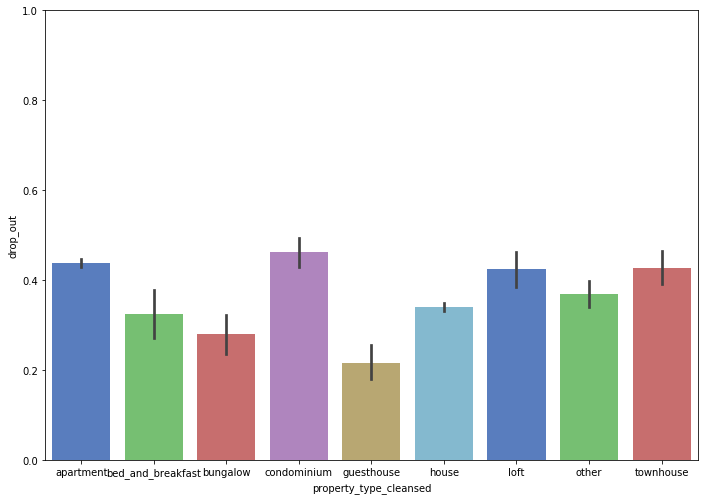

<Figure size 432x432 with 0 Axes>

In [14]:
#Property_type
#listings_2017.groupby('property_type_cleansed')['drop_out'].agg({'N': np.size, 'dropout_p': np.mean}).sort_values('dropout_p', ascending = False)
fig, ax = plt.subplots(figsize=(11.7, 8.27))
ax.set(ylim=(0, 1))
g = sns.factorplot(ax = ax, x="property_type_cleansed", y="drop_out", data = listings_2017,
                   size=6, kind="bar", palette="muted")
plt.gcf().clear()

In [15]:
#Neighborhood
pd.set_option('display.max_rows', 260)
x = listings_2017.groupby('neighbourhood_cleansed')['drop_out'].agg({'N': np.size, 'dropout_p': np.mean})
x[x['N'] > 100].sort_values('dropout_p', ascending = False)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  This is separate from the ipykernel package so we can avoid doing imports until


,N,dropout_p
neighbourhood_cleansed,,
marina del rey,163,0.570552
arcadia,169,0.568047
beverly crest,145,0.558621
west hollywood,834,0.522782
exposition park,140,0.507143
downtown,896,0.491071
rowland heights,335,0.462687
larchmont,122,0.459016
brentwood,208,0.456731


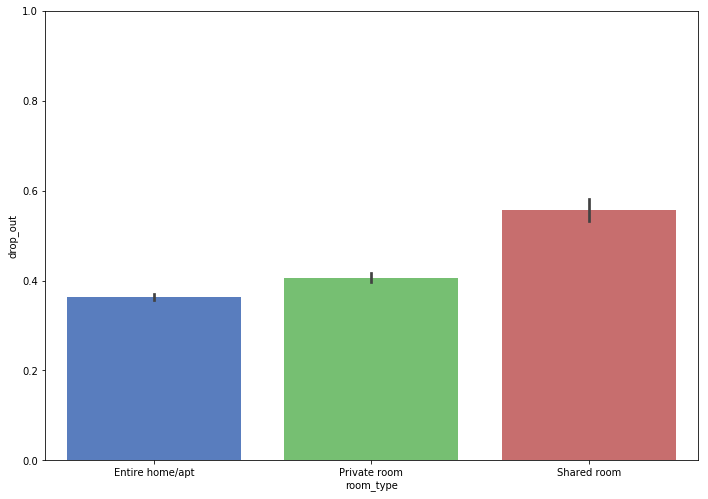

<Figure size 432x432 with 0 Axes>

In [16]:
#Room_type
fig, ax = plt.subplots(figsize=(11.7, 8.27))
ax.set(ylim=(0, 1))
g = sns.factorplot(ax=ax, x="room_type", y="drop_out", data = listings_2017,
                   size=6, kind="bar", palette="muted")
plt.gcf().clear()

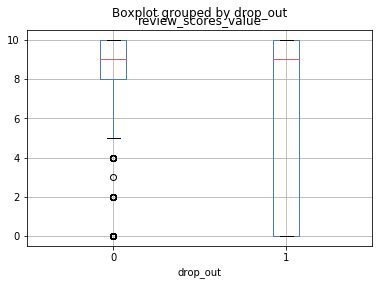

In [17]:
#reviews
listings_2017.boxplot(column=['review_scores_value'], by='drop_out')

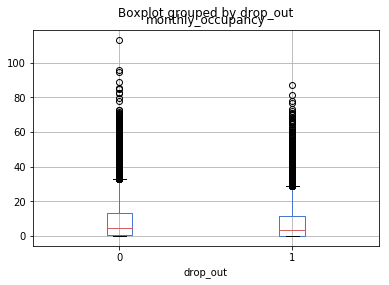

In [18]:
#monthly occupancy
listings_2017.boxplot(column=['monthly_occupancy'], by='drop_out')

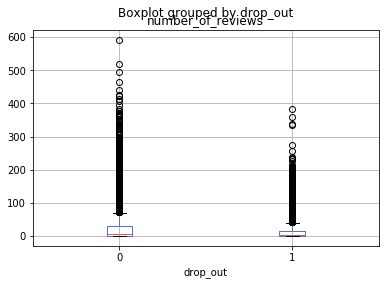

In [19]:
#number of reviews
listings_2017.boxplot(column=['number_of_reviews'], by='drop_out')

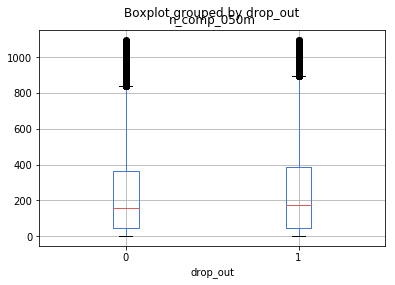

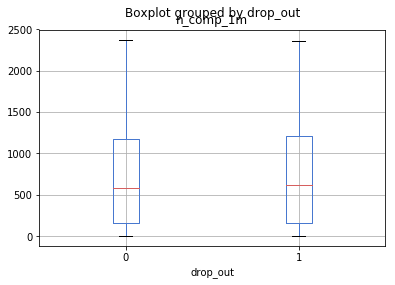

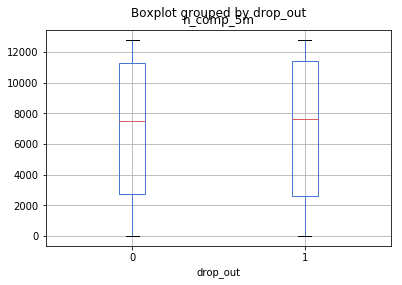

In [20]:
#number of competitors
listings_2017.boxplot(column=['n_comp_050m'], by='drop_out')
listings_2017.boxplot(column=['n_comp_1m'], by='drop_out')
listings_2017.boxplot(column=['n_comp_5m'], by='drop_out')


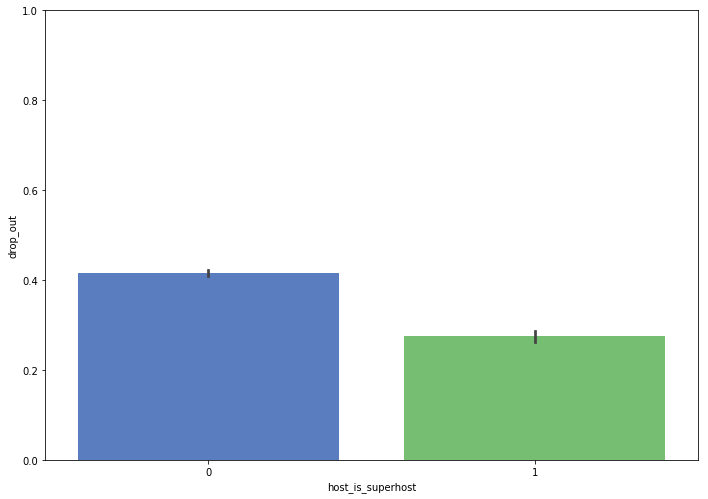

<Figure size 432x432 with 0 Axes>

In [21]:
#superhost status
fig, ax = plt.subplots(figsize=(11.7, 8.27))
ax.set(ylim=(0, 1))
g = sns.factorplot(ax = ax, x="host_is_superhost", y="drop_out", data = listings_2017,
                   size=6, kind="bar", palette="muted")
plt.gcf().clear()

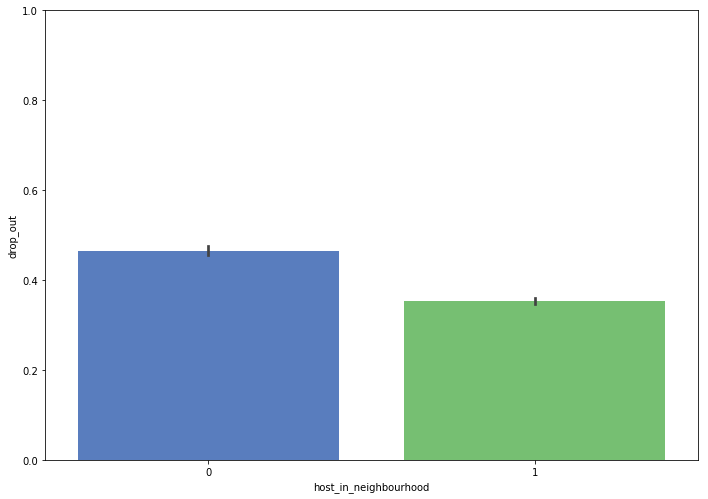

<Figure size 432x432 with 0 Axes>

In [22]:
#Host in same neighbourhood
fig, ax = plt.subplots(figsize=(11.7, 8.27))
ax.set(ylim=(0, 1))
g = sns.factorplot(ax = ax, x="host_in_neighbourhood", y="drop_out", data = listings_2017,
                   size=6, kind="bar", palette="muted")
plt.gcf().clear()

In [23]:
#Host verifications
x = [col for col in listings_2017 if col.startswith('host_v')]
for name in x:
    y = listings_2017.groupby(name)['drop_out'].agg({'N': np.size, 'dropout_p': np.mean})
    print(y)

                           N  dropout_p
host_v_manual_offline                  
0                      29660   0.389144
1                        492   0.390244
                            N  dropout_p
host_v_identity_manual                  
0                       29857   0.388552
1                         295   0.450847
                  N  dropout_p
host_v_email                  
0              1303   0.477360
1             28849   0.385178
                   N  dropout_p
host_v_google                  
0              28150   0.383979
1               2002   0.462038
                  N  dropout_p
host_v_weibo                  
0             30080   0.389029
1                72   0.444444
                   N  dropout_p
host_v_selfie                  
0              29852   0.388416
1                300   0.463333
                   N  dropout_p
host_v_sesame                  
0              30129   0.389326
1                 23   0.173913
                  N  dropout_p
host_v_phone 

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  after removing the cwd from sys.path.


In [24]:
#Host verifications
x = [col for col in listings_2017 if col.startswith('amenities_')]
for name in x:
    y = listings_2017.groupby(name)['drop_out'].agg({'N': np.size, 'dropout_p': np.mean})
    print(y)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  after removing the cwd from sys.path.


                                N  dropout_p
amenities_Private_entrance                  
0                           27847   0.392789
1                            2305   0.345336
                                          N  dropout_p
amenities_Pets_live_on_this_property                  
0                                     24978   0.401874
1                                      5174   0.327793
                             N  dropout_p
amenities_Self_Check-In                  
0                        26896   0.396862
1                         3256   0.325553
                           N  dropout_p
amenities_Safety_card                  
0                      24993   0.392790
1                       5159   0.371584
                                        N  dropout_p
amenities_Carbon_monoxide_detector                  
0                                   11027   0.401469
1                                   19125   0.382065
                            N  dropout_p
amenities_Game_cons